In [1]:
import numpy as np
import torch
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from torch import nn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('C:/Users/Юрий/Desktop/jupiter/course_work')

from MNIST import data
train_mnist, val_mnist, test_mnist = data('fashion-mnist')

In [3]:
class MnistDatasetConvolutional(torch.utils.data.Dataset):
    def __init__(self, t_mnist):
        self.x=t_mnist.drop('label', axis=1).values
        self.y=t_mnist['label'].values
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, i):
        return {'sample': torch.tensor(self.x[i], dtype=torch.float).reshape(-1, 28, 28), 'target': torch.tensor(self.y[i], dtype=torch.int64)}

In [4]:
train_set = MnistDatasetConvolutional(train_mnist)
test_set = MnistDatasetConvolutional(test_mnist)
val_set = MnistDatasetConvolutional(val_mnist)

In [5]:
train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = DataLoader(test_set, batch_size=64)
val_loader = DataLoader(val_set, batch_size=1024)

In [6]:
class MnistConvolutionalNN(nn.Module):
    def __init__(self, image_channels=1):
        super().__init__()
        self.encoder = nn.Sequential(  # 28 x 28
            nn.Conv2d(in_channels=image_channels, out_channels=6, 
                      kernel_size=5, padding='same'),  # 28 x 28
            nn.ReLU(),
            nn.MaxPool2d(2),  # 14 x 14
            nn.Conv2d(in_channels=6, out_channels=16, 
                      kernel_size=5, padding='same'),  # 14 x 14
            nn.ReLU(),
            nn.MaxPool2d(2),  # 7 x 7
            nn.Conv2d(in_channels=16, out_channels=10, kernel_size=5, padding='same')  # 7 x 7
        )
        
        self.head = nn.Sequential(
            nn.Linear(in_features=490, out_features=50), # 90
            nn.ReLU(),
            nn.Linear(in_features=50, out_features=10)
        )
    def forward(self, x):
        out = self.encoder(x)
        out = nn.Flatten()(out)
        out = self.head(out)
        return out

In [17]:
from Train import train, test

In [18]:
from NN import MnistConvolutional_1, MnistConvolutional_2, MnistConvolutional_3,  MnistConvolutional_4, MnistConvolutional_5, MnistConvolutional_11, MnistConvolutional_12, MnistConvolutional_13, MnistConvolutional_14, MnistConvolutional_15, MnistConvolutional_16

In [19]:
NNS = [MnistConvolutional_2, MnistConvolutional_1, MnistConvolutional_3,  MnistConvolutional_4, MnistConvolutional_5]

In [20]:
EPOCHS = 100
results = []
for NN in NNS:
    model = NN()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
    criterion = nn.CrossEntropyLoss()
    val_loss_log, val_acc_log = train(model, criterion, optimizer, EPOCHS, train_loader, val_loader)
    loss_test, acc_test = test(model, criterion, test_loader)
    print(f'loss = {np.mean(loss_test)}, accuracy = {np.mean(acc_test)}')
    
    results.append([min(val_loss_log), max(val_acc_log), np.mean(loss_test), np.mean(acc_test)])
#info = model.compile

epoch = 1, loss = 0.36130326986312866, accuracy = 0.8686
epoch = 2, loss = 0.30715495347976685, accuracy = 0.8858
epoch = 3, loss = 0.27922242879867554, accuracy = 0.9016
epoch = 4, loss = 0.24419474601745605, accuracy = 0.9128
epoch = 5, loss = 0.24763917922973633, accuracy = 0.9116
loss = 0.2490132451057434, accuracy = 0.9102
epoch = 1, loss = 0.4070013165473938, accuracy = 0.8516
epoch = 2, loss = 0.33569952845573425, accuracy = 0.876
epoch = 3, loss = 0.30277150869369507, accuracy = 0.8922
epoch = 4, loss = 0.2899366021156311, accuracy = 0.8926
epoch = 5, loss = 0.288273423910141, accuracy = 0.892
epoch = 6, loss = 0.2735087275505066, accuracy = 0.9036
epoch = 7, loss = 0.25193479657173157, accuracy = 0.9094
epoch = 8, loss = 0.2525480091571808, accuracy = 0.9122
loss = 0.24913962185382843, accuracy = 0.9072
epoch = 1, loss = 0.44519320130348206, accuracy = 0.8386
epoch = 2, loss = 0.3862403929233551, accuracy = 0.8598
epoch = 3, loss = 0.34381869435310364, accuracy = 0.8784
epoch 

In [21]:
val_loss = [row[0] for row in results]
val_acc = [row[1] for row in results]
test_loss = [row[2] for row in results]
test_acc = [row[3] for row in results]

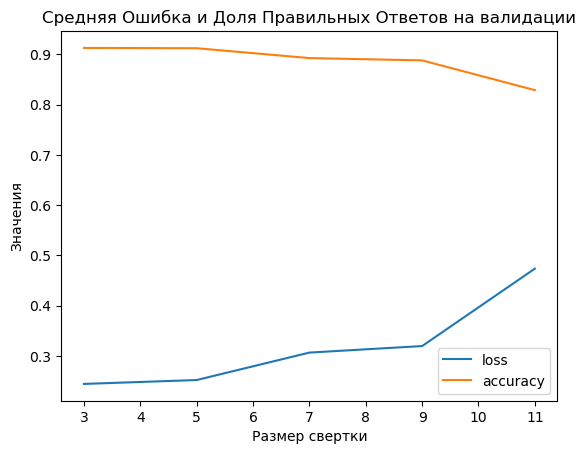

In [25]:
plt.plot([3, 5, 7, 9, 11], val_loss, label = 'loss')
plt.plot([3, 5, 7, 9, 11], val_acc, label = 'accuracy')
plt.xlabel('Размер свертки') 
plt.ylabel('Значения')
plt.title('Средняя Ошибка и Доля Правильных Ответов на валидации')
plt.legend()

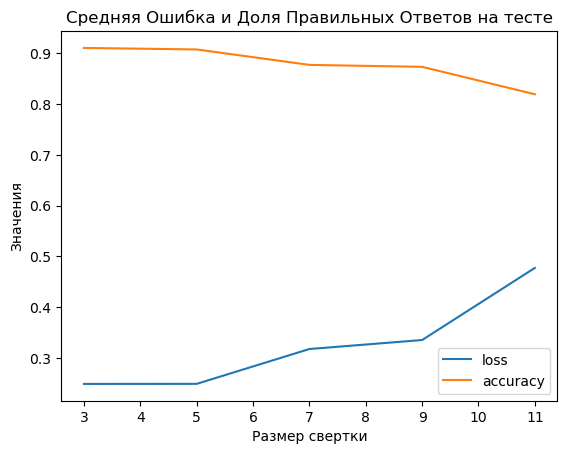

In [26]:
plt.plot([3, 5, 7, 9, 11], test_loss, label = 'loss')
plt.plot([3, 5, 7, 9, 11], test_acc, label = 'accuracy')
plt.xlabel('Размер свертки') 
plt.ylabel('Значения')
plt.title('Средняя Ошибка и Доля Правильных Ответов на тесте')
plt.legend()

In [9]:
EPOCHS = 100
model = MnistConvolutional_11()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = nn.CrossEntropyLoss()

In [10]:
val_loss_log, val_acc_log = train(model, criterion, optimizer, EPOCHS, train_loader, val_loader)

epoch = 1, loss = 0.11634711921215057, accuracy = 0.9646
epoch = 2, loss = 0.07530864328145981, accuracy = 0.9768
epoch = 3, loss = 0.06700383126735687, accuracy = 0.978
epoch = 4, loss = 0.06272284686565399, accuracy = 0.9804
epoch = 5, loss = 0.05440785363316536, accuracy = 0.984
epoch = 6, loss = 0.05114617943763733, accuracy = 0.9844
epoch = 7, loss = 0.04691942408680916, accuracy = 0.9878
epoch = 8, loss = 0.04895921051502228, accuracy = 0.9878


In [21]:
loss_test, acc_test = test(model, criterion, test_loader)
print(f'loss = {np.mean(loss_test)}, accuracy = {np.mean(acc_test)}')

loss = 0.1394902914762497, accuracy = 0.9574
